In [48]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [49]:
woj = pd.read_csv("przestepstwa.csv")
pow = pd.read_csv("przestepstwa_pow.csv")
#woj_map = "wojewodztwa.shp"
pow_map = "powiaty.shp"
#woj_m = gpd.read_file(woj_map)
pow_m = gpd.read_file(pow_map)

In [50]:
woj

,oid,kod KTS,województwo,powierzchnia,rok,TERYT,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,1,11200000000,małopolskie,15183.0,2020,12,69174.0
1,2,12400000000,śląskie,12333.0,2020,24,117632.0
2,3,20800000000,lubuskie,13988.0,2020,8,24531.0
3,4,23000000000,wielkopolskie,29826.0,2020,30,58900.0
4,5,23200000000,zachodniopomorskie,22905.0,2020,32,35325.0
5,6,30200000000,dolnośląskie,19947.0,2020,2,74802.0
6,7,31600000000,opolskie,9412.0,2020,16,15710.0
7,8,40400000000,kujawsko-pomorskie,17971.0,2020,4,37172.0
8,9,42200000000,pomorskie,18323.0,2020,22,49381.0
9,10,42800000000,warmińsko-mazurskie,24173.0,2020,28,26295.0


In [51]:
woj.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT'], axis=1, inplace=True)
woj.rename(columns={'województwo': 'JPT_NAZWA_'}, inplace=True)
woj

,JPT_NAZWA_,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,małopolskie,69174.0
1,śląskie,117632.0
2,lubuskie,24531.0
3,wielkopolskie,58900.0
4,zachodniopomorskie,35325.0
5,dolnośląskie,74802.0
6,opolskie,15710.0
7,kujawsko-pomorskie,37172.0
8,pomorskie,49381.0
9,warmińsko-mazurskie,26295.0


In [52]:
woj.describe()

,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
count,16.000000
mean,47838.000000
std,31133.054732
min,15710.000000
25%,25854.000000
50%,36248.500000
75%,61468.500000
max,117632.000000


In [53]:
woj.dtypes

JPT_NAZWA_                                                                                                                                                 object
Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem    float64
dtype: object

In [54]:
pow

,oid,kod KTS,powiat,powierzchnia,rok,TERYT,Typ powiatu,TERYT województwa,Województwo,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem
0,7,11212210000,nowosądecki,1549.0,2020,1210,powiat,12,małopolskie,11958.0
1,2,11212416000,tarnowski,1412.0,2020,1216,powiat,12,małopolskie,2860.0
2,5,20811301000,gorzowski,1214.0,2020,801,powiat,8,lubuskie,1108.0
3,40,23015810000,koniński,1578.0,2020,3010,powiat,30,wielkopolskie,1163.0
4,13,23016121000,poznański,1900.0,2020,3021,powiat,30,wielkopolskie,5260.0
...,...,...,...,...,...,...,...,...,...,...
375,39,71427126000,siedlecki,1603.0,2020,1426,powiat,14,mazowieckie,766.0
376,377,71427129000,sokołowski,1131.0,2020,1429,powiat,14,mazowieckie,919.0
377,378,71427133000,węgrowski,1221.0,2020,1433,powiat,14,mazowieckie,807.0
378,379,71427328000,sochaczewski,735.0,2020,1428,powiat,14,mazowieckie,1419.0


In [55]:
pow.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)
pow.rename(columns={'powiat': 'JPT_NAZWA_'}, inplace=True)
pow.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem': 'Przestępstwa_powiaty'
}, inplace=True)
pow

,JPT_NAZWA_,Województwo,Przestępstwa_powiaty
0,nowosądecki,małopolskie,11958.0
1,tarnowski,małopolskie,2860.0
2,gorzowski,lubuskie,1108.0
3,koniński,wielkopolskie,1163.0
4,poznański,wielkopolskie,5260.0
...,...,...,...
375,siedlecki,mazowieckie,766.0
376,sokołowski,mazowieckie,919.0
377,węgrowski,mazowieckie,807.0
378,sochaczewski,mazowieckie,1419.0


In [56]:
pow.describe()

,Przestępstwa_powiaty
count,380.000000
mean,2014.231579
std,3182.327268
min,239.000000
25%,839.500000
50%,1271.500000
75%,2014.500000
max,45754.000000


<Axes: >

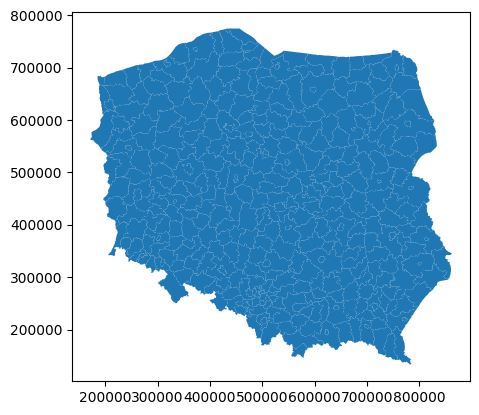

In [57]:
pow_m.plot(legend=True)

In [58]:
pow_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,...,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.53 579834.38, 342632.859 5798..."


In [59]:
pow_m['JPT_NAZWA_'] = pow_m['JPT_NAZWA_'].str.replace('powiat ', '', regex=False)

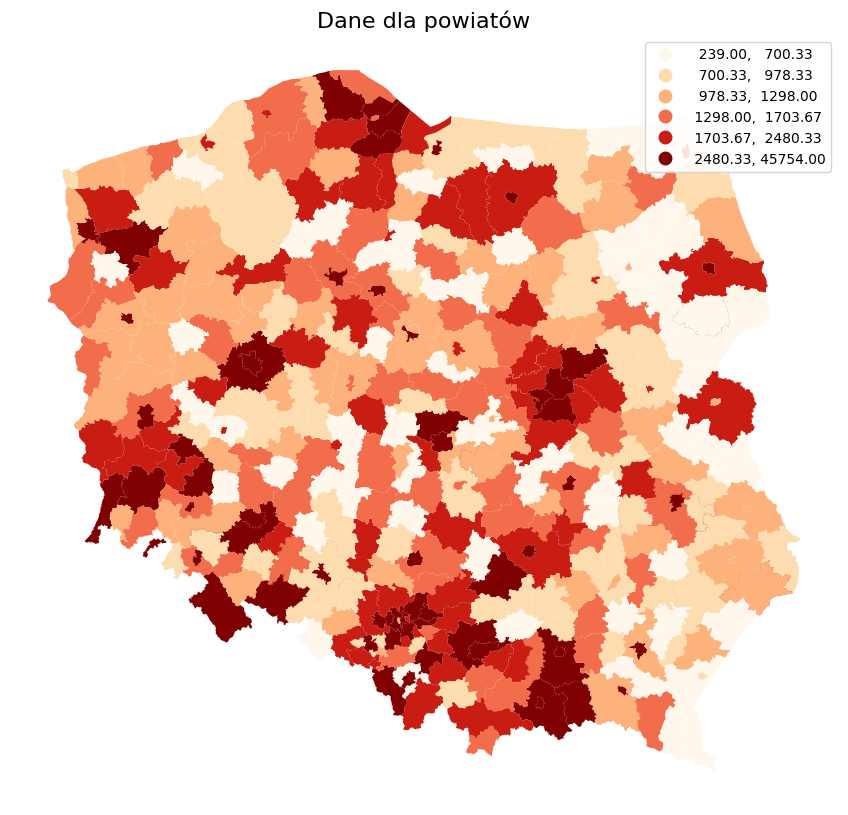

In [63]:
from mapclassify import classify
import matplotlib.pyplot as plt

merged_pow = pow_m.merge(pow, on='JPT_NAZWA_')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow.plot(column='Przestępstwa_powiaty',
                scheme='Quantiles',  # Możesz wypróbować również 'EqualInterval' lub 'NaturalBreaks'
                k=6,  # Liczba klas (np. 6)
                cmap='OrRd',  # Kolorystyka mapy
                ax=ax,
                legend=True)

ax.set_axis_off()
plt.title('Dane dla powiatów', fontsize=16)
plt.show()